<a href="https://colab.research.google.com/github/nurainizafiraaa/Exploring-Machine-Learning-Advanced-Classification-Techniques/blob/main/zafira_nuraini_assignment_day_35_supervised_machine_learning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Indikator penilaian
## Wajib di google colab, jika tidak di google colab ada pengurangan nilai -5
## Pengerjaan harus sesuai template yang disediakan, jika tidak ada pengurangan nilai -5 (untuk memudahkan membaca code)
## share to arifromadhan19@gmail.com

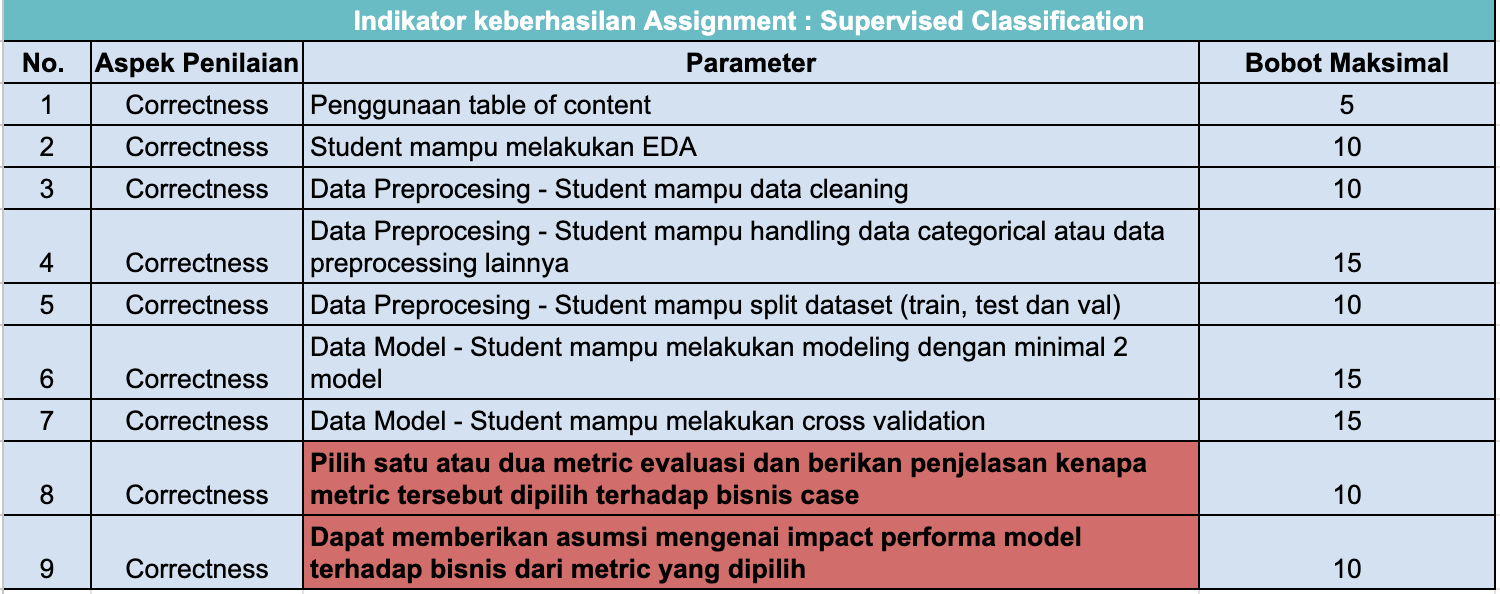

## **Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score

## **Load dataset and Statistical Summary**

In [ ]:
df = pd.read_csv('1702184567307-WA_FnUseC_TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Ubah Total Charges ke numeric dari object
df['TotalCharges']=pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
numericals = ['tenure','MonthlyCharges', 'TotalCharges']
df[numericals].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


**Observation**:
* pada kolom tenure dan total charges memiliki distribusi mean > median sehingga distribusinya right skewed.
* pada monthly charges mengindikasikan left skewed karena mean < median.

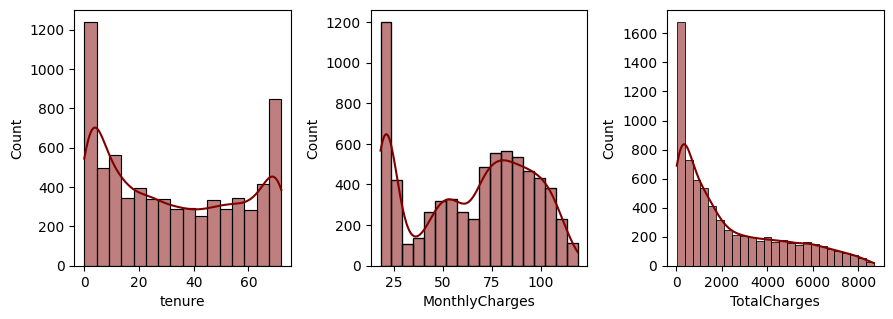

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//1 + 1, i+1)
    sns.histplot(x=df[features[i]], color='maroon', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
* Pada data tenure terlihat ada 2 kelompok (tenure rendah dan tinggi).
* Pada monthly charges ada lonjakan di sisi kiri.
* Pada total charges terlihat terbentuk positive skewness secara jelas.

## **Feature Engineering**

### Deteksi Duplikat

In [ ]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

### Deteksi Missing Value

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'customerID' Has 0 missing values (0.00%)
Column 'gender' Has 0 missing values (0.00%)
Column 'SeniorCitizen' Has 0 missing values (0.00%)
Column 'Partner' Has 0 missing values (0.00%)
Column 'Dependents' Has 0 missing values (0.00%)
Column 'tenure' Has 0 missing values (0.00%)
Column 'PhoneService' Has 0 missing values (0.00%)
Column 'MultipleLines' Has 0 missing values (0.00%)
Column 'InternetService' Has 0 missing values (0.00%)
Column 'OnlineSecurity' Has 0 missing values (0.00%)
Column 'OnlineBackup' Has 0 missing values (0.00%)
Column 'DeviceProtection' Has 0 missing values (0.00%)
Column 'TechSupport' Has 0 missing values (0.00%)
Column 'StreamingTV' Has 0 missing values (0.00%)
Column 'StreamingMovies' Has 0 missing values (0.00%)
Column 'Contract' Has 0 missing values (0.00%)
Column 'PaperlessBilling' Has 0 missing values (0.00%)
Column 'PaymentMethod' Has 0 missing values (0.00%)
Column 'MonthlyCharges' Has 0 missing values (0.00%)
Column 'TotalCharges' Has 11 missing 

Ada missing value pada total charges, maka kita akan isi dengan rata" total charges di masing" dataset saat sudah di split.

### Deteksi Ouliers

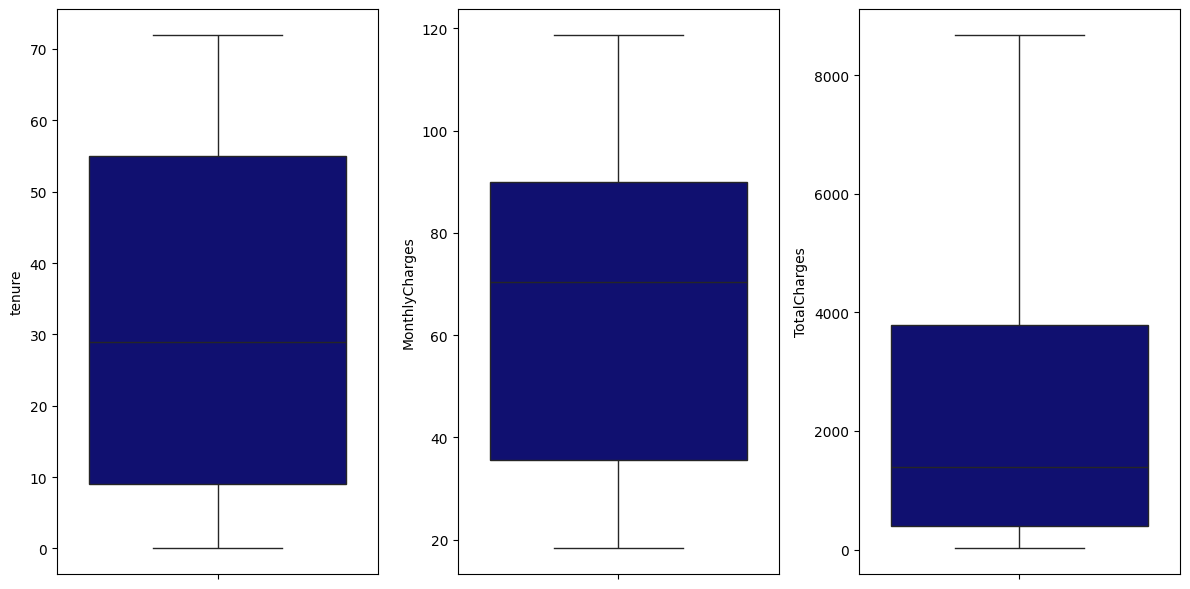

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='navy')
    plt.tight_layout()

In [ ]:
for col in numericals:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"{col}: {len(outliers)} outliers")

tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


**Tidak terdapat outliers dalam data train.**

## **Label Encoding Churn**

In [ ]:
# Mengambil kolom yang bukan numerik
kolom_non_numerik = df.select_dtypes(exclude=['number']).columns.tolist()
kolom_non_numerik.remove("customerID")

kolom_non_numerik

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
le = preprocessing.LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

In [ ]:
for col in kolom_non_numerik:
  print(f"==== {col} ====")
  print(df[col].value_counts(), '\n')

==== gender ====
gender
Male      3555
Female    3488
Name: count, dtype: int64 

==== Partner ====
Partner
No     3641
Yes    3402
Name: count, dtype: int64 

==== Dependents ====
Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

==== PhoneService ====
PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

==== MultipleLines ====
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

==== InternetService ====
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

==== OnlineSecurity ====
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 

==== OnlineBackup ====
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 

==== DeviceProtection ====
DeviceProtection
No                     3095
Yes                    24

In [ ]:
# Mengganti beberapa data yang masih No .... menjadi No sebelum di encode
cols_need_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for cols in cols_need_replace:
  df[col] = df[col].replace({'No internet service': 'No'})

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

## **Split Dataset**

In [ ]:
x = df.drop(['customerID','Churn'],axis = 1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

x_train.shape, x_test.shape

((5634, 19), (1409, 19))

## **EDA**

#### Correlation between numericals variabel

<Axes: >

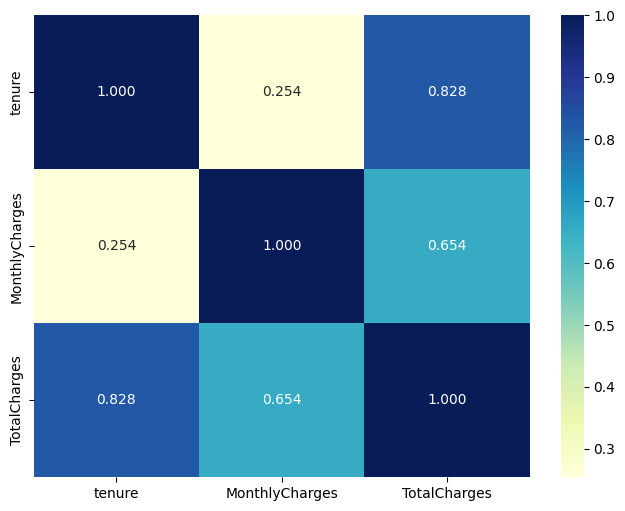

In [ ]:
# correlation heatmap pada variabel numerical
plt.figure(figsize=(8,6))
correlation = x_train[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.3f',cmap='YlGnBu')

Observation:
* Tenure dan Total Charges memiliki korelasi yang cukup kuat, yakni di 0.828
* Monthly Charges dan Total Charges memiliki korelasi sedang di 0.654
* Tenure dan monthly charges memiliki korelasi yang lemah di 0.254

#### Correlation between all variabel with Churn

In [ ]:
# Cek korleasi ke Churn

for col in df:
    contingency = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"{col}: chi2={chi2:.3f}, p-value={p:.3f}")


customerID: chi2=7043.000, p-value=0.494
gender: chi2=0.484, p-value=0.487
SeniorCitizen: chi2=159.426, p-value=0.000
Partner: chi2=158.733, p-value=0.000
Dependents: chi2=189.129, p-value=0.000
tenure: chi2=1065.331, p-value=0.000
PhoneService: chi2=0.915, p-value=0.339
MultipleLines: chi2=11.143, p-value=0.001
InternetService: chi2=732.310, p-value=0.000
OnlineSecurity: chi2=849.999, p-value=0.000
OnlineBackup: chi2=601.813, p-value=0.000
DeviceProtection: chi2=558.419, p-value=0.000
TechSupport: chi2=828.197, p-value=0.000
StreamingTV: chi2=374.204, p-value=0.000
StreamingMovies: chi2=375.661, p-value=0.000
Contract: chi2=1184.597, p-value=0.000
PaperlessBilling: chi2=258.278, p-value=0.000
PaymentMethod: chi2=648.142, p-value=0.000
MonthlyCharges: chi2=2123.609, p-value=0.000
TotalCharges: chi2=6503.575, p-value=0.586
Churn: chi2=7037.871, p-value=0.000


Observation:

* Variabel yang berhubungan dnegan Churn (p < 0.05), dengan semakin besar nilai churn maka korelasinya makin kuat:

1. Monthly Charges
2. Contract
3. Tenure
4. Online Security
5. TechSupport
6. Internet Service
7. Payment Method
8. OnlineBackup
9. DeviceProtection
10. StreamingMovies
11. StreamingTV
12. PaperlessBilling
13. SeniorCitizen
14. Partner
15. Dependents
16. MultipleLines

#### Distribusi Churn

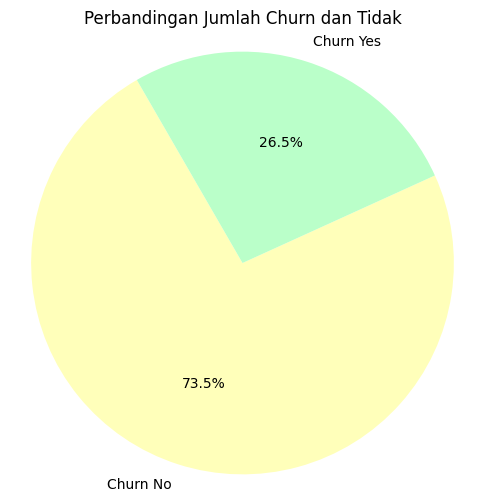

In [ ]:
# Pie chart
pastel = ['#FFFFBA', '#BAFFC9', '#BAE1FF', '#FFB3BA', '#FFDFBA']

sizes = df["Churn"].value_counts().values
labels = ["Churn No", "Churn Yes"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=120, colors=pastel)
plt.title('Perbandingan Jumlah Churn dan Tidak')
plt.axis('equal')
plt.show()

## **Train**

### Data Preprocessing


#### Handle Missing Value in x_train

In [ ]:
# Isi missing value di total charges dengan median
x_train["TotalCharges"] = x_train["TotalCharges"].fillna(df["TotalCharges"].median())

In [ ]:
x_train.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#### Label Encoding Data Train

In [ ]:
# Encode semua kolom kategorikal

le = preprocessing.LabelEncoder()

for col in x_train.columns:
    if x_train[col].dtype == "object":
        x_train[col] = le.fit_transform(x_train[col])

In [ ]:
for col in x_train:
  print(f"==== {col} ====")
  print(x_train[col].value_counts(), '\n')

==== gender ====
gender
1    2887
0    2747
Name: count, dtype: int64 

==== SeniorCitizen ====
SeniorCitizen
0    4728
1     906
Name: count, dtype: int64 

==== Partner ====
Partner
0    2904
1    2730
Name: count, dtype: int64 

==== Dependents ====
Dependents
0    3951
1    1683
Name: count, dtype: int64 

==== tenure ====
tenure
1     476
72    286
2     174
3     161
4     147
     ... 
44     46
36     43
39     43
45     43
0      10
Name: count, Length: 73, dtype: int64 

==== PhoneService ====
PhoneService
1    5082
0     552
Name: count, dtype: int64 

==== MultipleLines ====
MultipleLines
0    3237
1    2397
Name: count, dtype: int64 

==== InternetService ====
InternetService
1    2481
0    1939
2    1214
Name: count, dtype: int64 

==== OnlineSecurity ====
OnlineSecurity
0    2810
2    1610
1    1214
Name: count, dtype: int64 

==== OnlineBackup ====
OnlineBackup
0    2448
2    1972
1    1214
Name: count, dtype: int64 

==== DeviceProtection ====
DeviceProtection
0    248

#### Scaling (jika perlu)

in this case karena akan pake decesion tree dan random forest maka tidak perlu karena modeling dilakukan bukan berdasarkan skala fitur numerik.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train[numericals])

x_train_std

array([[-4.65683364e-01, -4.73723375e-04, -4.21345130e-01],
       [ 8.85536787e-01,  1.07475386e+00,  1.25588791e+00],
       [-1.28460467e+00, -1.37649913e+00, -1.00215117e+00],
       ...,
       [-8.34197950e-01, -1.45294499e+00, -8.77176266e-01],
       [-8.34197950e-01,  1.14953785e+00, -4.81776199e-01],
       [-2.60953038e-01, -1.49781538e+00, -8.10288602e-01]])

### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

### **Model Decision Tree**

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1234, class_weight="balanced")
model_dt = dt.fit(x_train, y_train)

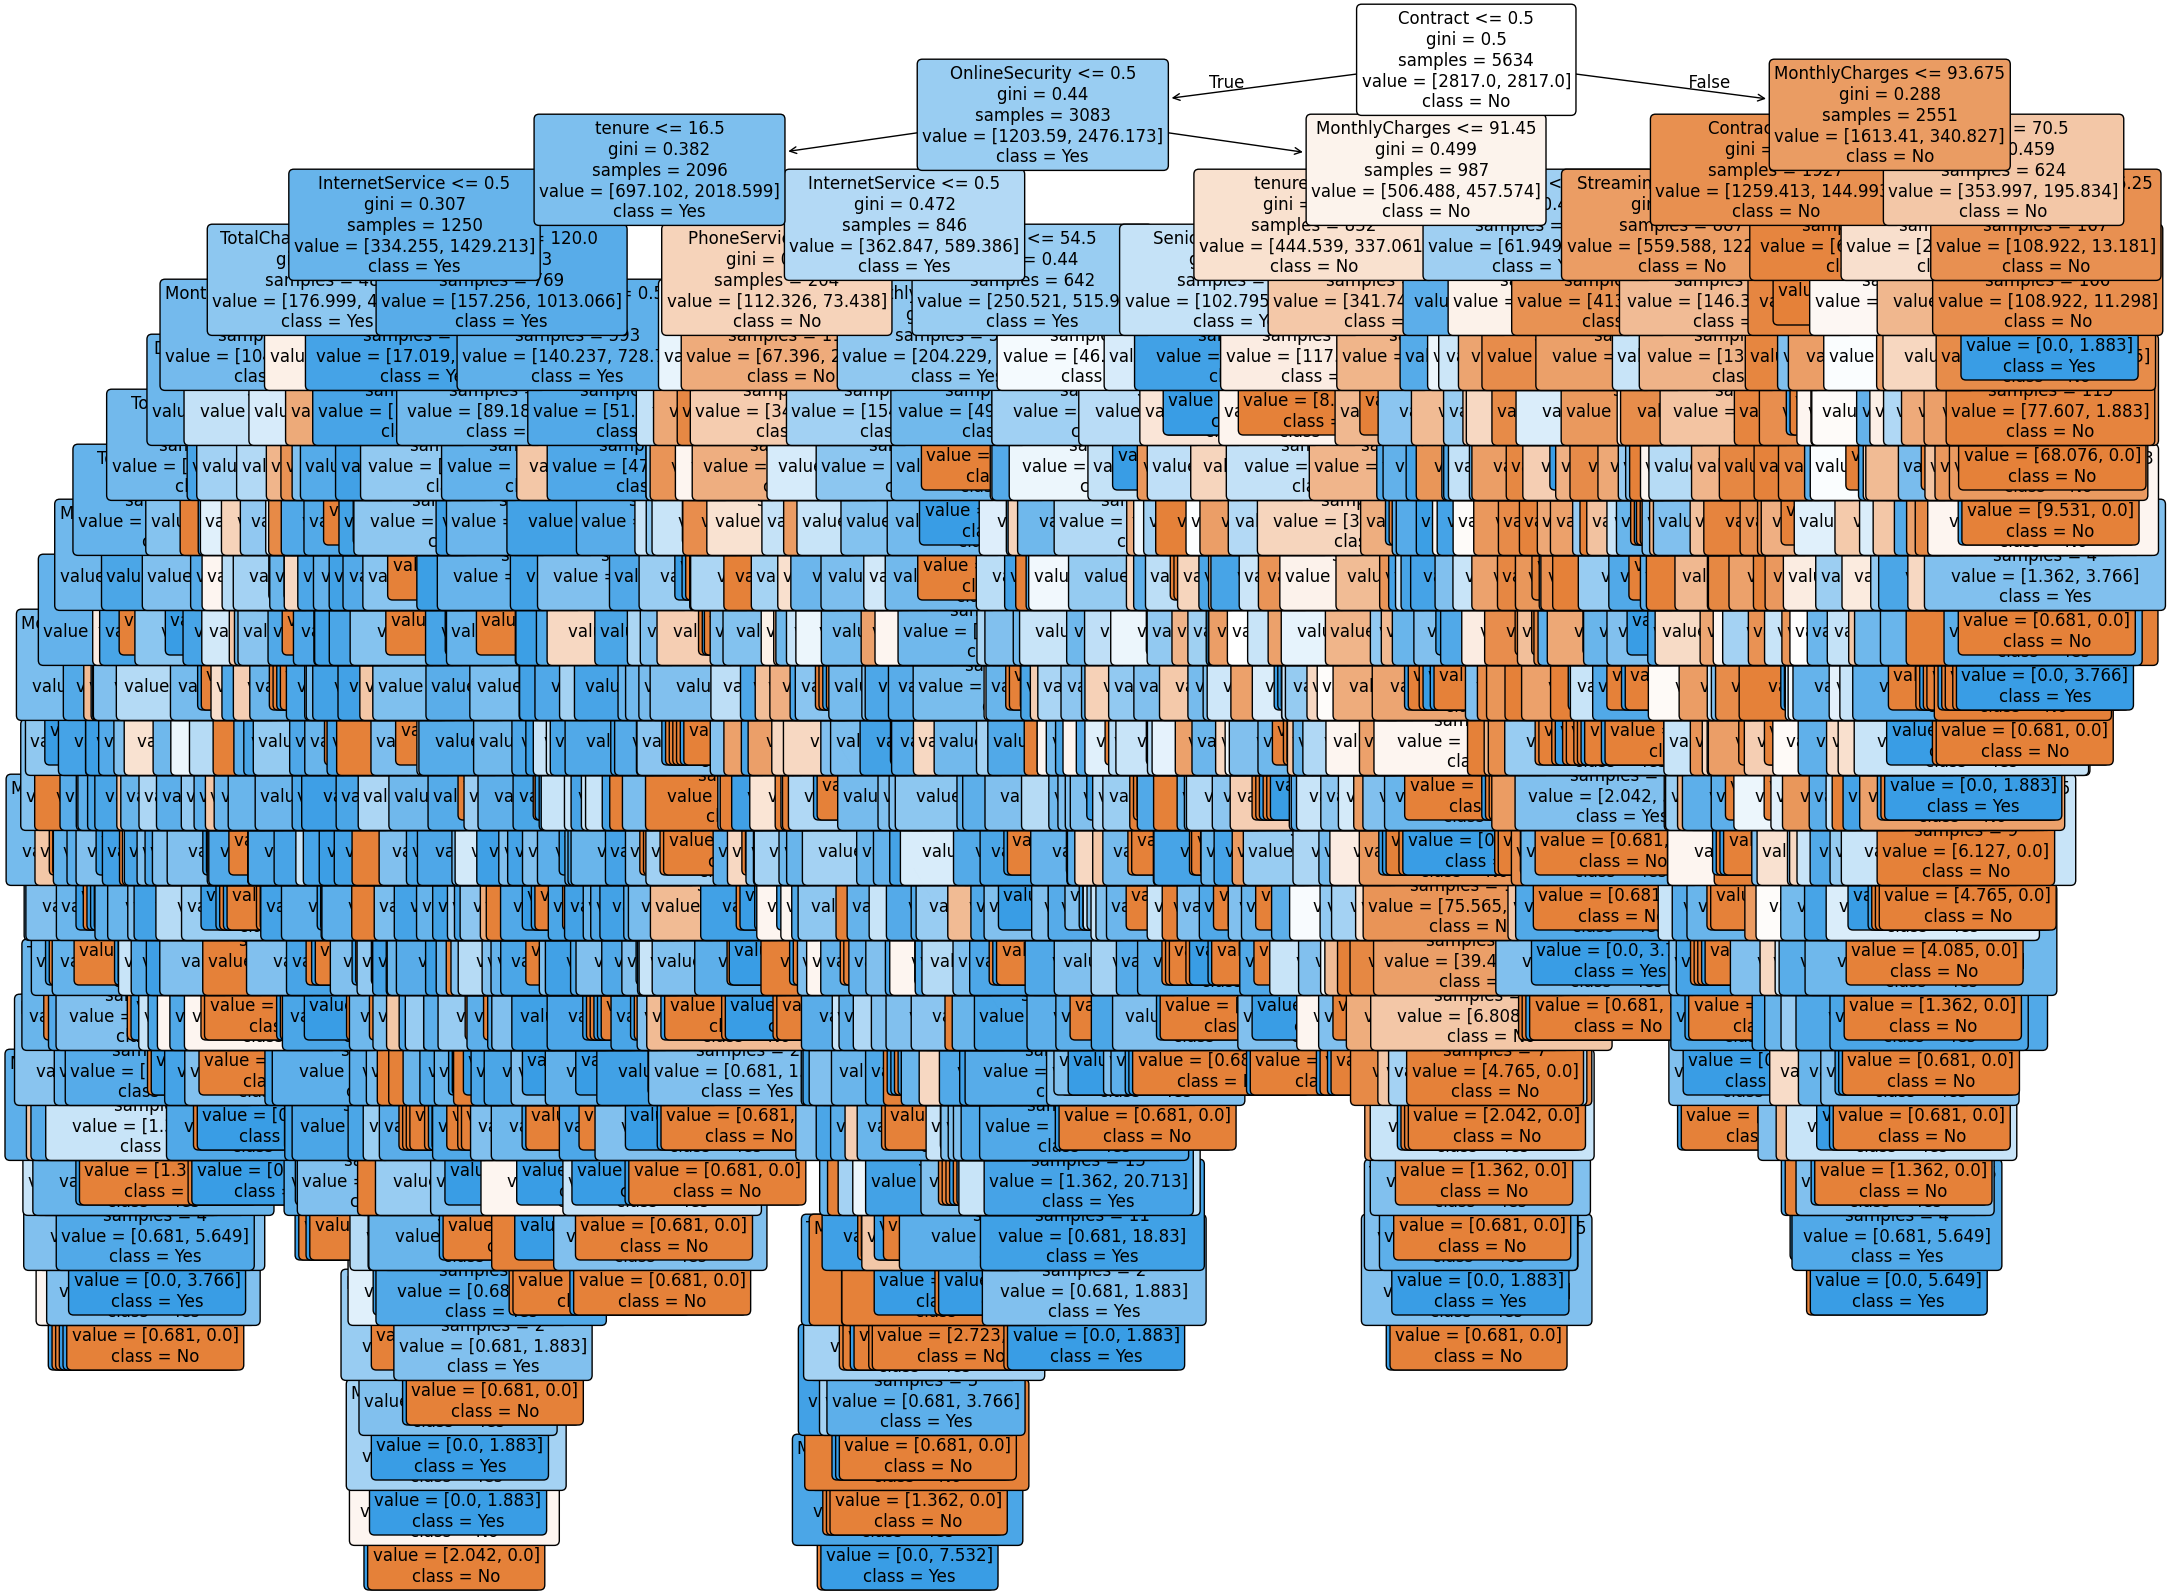

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=x_train.columns,
                   class_names=['No','Yes'],
                   filled=True,
                   rounded=True,
                   fontsize=12)
plt.show()

In [ ]:
# Melakukan prediksi data test
y_train_dt = model_dt.predict(x_train)
y_train_dt

array([0, 0, 1, ..., 0, 1, 0])

#### **Evaluation Model Decision Tree (Train)**

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [ ]:
# Cross-validation dengan f1_score sebagai metric
cv_scores_train = cross_val_score(model_dt, x_train, y_train, cv=5, scoring='f1')

# Print hasil
print("F1-score rata-rata:", cv_scores_train)
print("F1-score rata-rata:", cv_scores_train.mean())

F1-score rata-rata: [0.49514563 0.48965517 0.4519573  0.50567261 0.45423729]
F1-score rata-rata: 0.47933359927826735


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
recall_scores = []
precision_scores = []

for train_index, val_index in kf.split(x_train):
    X_train_fold = x_train.iloc[train_index]
    X_val_fold = x_train.iloc[val_index]
    y_train_fold = y_train.iloc[train_index]
    y_val_fold = y_train.iloc[val_index]

    dt.fit(X_train_fold, y_train_fold)
    y_pred = dt.predict(X_val_fold)

    f1_scores.append(f1_score(y_val_fold, y_pred))
    recall_scores.append(recall_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))

f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)
recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)

print("F1-score: mean =", f1_mean, ", std =", f1_std)
print("Recall: mean =", recall_mean, ", std =", recall_std)
print("Precision: mean =", precision_mean, ", std =", precision_std)


F1-score: mean = 0.4780708910458455 , std = 0.02238082835654561
Recall: mean = 0.47649571913452815 , std = 0.024026420043935175
Precision: mean = 0.4798022598785603 , std = 0.022157600278078452


In [ ]:
print('Classification Report', classification_report(y_train, y_train_dt))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       0.99      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [ ]:
print('Confusion Matrix', confusion_matrix(y_train, y_train_dt))

Confusion Matrix [[4129    9]
 [   0 1496]]


In [ ]:
# calculate ROC-AUC

y_train_proba = dt.predict_proba(x_train)[:,1]
print('AUC:', roc_auc_score(y_train, y_train_proba))

AUC: 0.9294975904813352


**Observation:**

1. Dari ROC-AUC (0.929) mendekati 1 yang artinya performa model sangat baik.
2. Dari Confussion matrix terlihat bahwa model tidak ada False Negative (0) atau berhasil memprediksi semua churn, serta False Positive (9) yaitu memprediksi tidak churn ke churn. Hal ini menunjukkan performa yang sangat baik dari model.
3. Model memiliki precission, recall dan F1 Score yang sangat baik (1).

**Notes:**

Dengan cross validation model menunjukkan hasil precission, recall dan F1-Score yang turun di 0.48.

**Hal ini mengindikasikan adanya overfitting dari model.**

### **Model Random Forest**

In [ ]:
model_rf = RandomForestClassifier(random_state=1234, class_weight="balanced")
model_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1234)

In [ ]:
preds_train = model_rf.predict(x_train)
preds_train

array([0, 0, 1, ..., 0, 1, 0])

#### **Evaluation Random Forest (Train)**

In [ ]:
# Cross-validation dengan f1_score sebagai metric
cv_scores_train_rf = cross_val_score(model_rf, x_train, y_train, cv=5, scoring='f1')

# Print hasil
print("F1-score rata-rata:", cv_scores_train_rf)
print("F1-score rata-rata:", cv_scores_train_rf.mean())

F1-score rata-rata: [0.59357278 0.52226721 0.51272016 0.54022989 0.52277228]
F1-score rata-rata: 0.5383124608293355


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
recall_scores = []
precision_scores = []

for train_index, val_index in kf.split(x_train):
    X_train_fold = x_train.iloc[train_index]
    X_val_fold = x_train.iloc[val_index]
    y_train_fold = y_train.iloc[train_index]
    y_val_fold = y_train.iloc[val_index]

    rf_fold = RandomForestClassifier(random_state=1234, class_weight='balanced')
    rf_fold.fit(X_train_fold, y_train_fold)

    y_pred_fold = rf_fold.predict(X_val_fold)

    f1_scores.append(f1_score(y_val_fold, y_pred_fold))
    recall_scores.append(recall_score(y_val_fold, y_pred_fold))
    precision_scores.append(precision_score(y_val_fold, y_pred_fold))

print("F1-score: mean =", f1_mean, ", std =", f1_std)
print("Recall: mean =", recall_mean, ", std =", recall_std)
print("Precision: mean =", precision_mean, ", std =", precision_std)


F1-score: mean = 0.4780708910458455 , std = 0.02238082835654561
Recall: mean = 0.47649571913452815 , std = 0.024026420043935175
Precision: mean = 0.4798022598785603 , std = 0.022157600278078452


In [ ]:
print('Classification Report', classification_report(y_train, preds_train))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [ ]:
print('Confusion Matrix', confusion_matrix(y_train, preds_train))

Confusion Matrix [[4132    6]
 [   2 1494]]


In [ ]:
# calculate ROC-AUC

proba_train = model_rf.predict_proba(x_train)[:,1]
print('AUC:', roc_auc_score(y_train, proba_train))

AUC: 0.9998151183888468


**Observation:**

1. Dari ROC-AUC (0.999) mendekati 1 yang artinya performa model sangat baik.
2. Dari Confussion matrix terlihat bahwa model tidak ada False Negative (2) atau berhasil memprediksi semua churn, serta False Positive (6) yaitu memprediksi tidak churn ke churn. Hal ini menunjukkan performa yang sangat baik dari model.
3. Model memiliki precission, recall dan F1 Score yang sangat baik (1).

**Notes:**

Dengan cross validation model menunjukkan hasil precission, recall dan F1-Score yang turun di 0.48.

**Hal ini mengindikasikan adanya overfitting dari model.**

## **Test**

### Data Preprocessing

#### Handling Missing Value in x_test

In [ ]:
# Isi missing value di total charges dengan median

x_test["TotalCharges"] = x_test["TotalCharges"].fillna(df["TotalCharges"].median())

In [ ]:
x_test.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#### Label Encoding Data Test

In [ ]:
# Encode semua kolom kategorikal

le = preprocessing.LabelEncoder()

for col in x_test.columns:
    if x_test[col].dtype == "object":
        x_test[col] = le.fit_transform(x_test[col])

In [ ]:
for col in x_test:
  print(f"==== {col} ====")
  print(x_test[col].value_counts(), '\n')

==== gender ====
gender
0    741
1    668
Name: count, dtype: int64 

==== SeniorCitizen ====
SeniorCitizen
0    1173
1     236
Name: count, dtype: int64 

==== Partner ====
Partner
0    737
1    672
Name: count, dtype: int64 

==== Dependents ====
Dependents
0    982
1    427
Name: count, dtype: int64 

==== tenure ====
tenure
1     137
72     76
2      64
70     40
3      39
     ... 
47      7
62      6
44      5
43      4
0       1
Name: count, Length: 73, dtype: int64 

==== PhoneService ====
PhoneService
1    1279
0     130
Name: count, dtype: int64 

==== MultipleLines ====
MultipleLines
0    835
1    574
Name: count, dtype: int64 

==== InternetService ====
InternetService
1    615
0    482
2    312
Name: count, dtype: int64 

==== OnlineSecurity ====
OnlineSecurity
0    688
2    409
1    312
Name: count, dtype: int64 

==== OnlineBackup ====
OnlineBackup
0    640
2    457
1    312
Name: count, dtype: int64 

==== DeviceProtection ====
DeviceProtection
0    606
2    491
1    31

#### Scaling

In [ ]:
x_test_std = scaler.transform(x_test[numericals])

x_test_std

array([[-1.28460467, -1.33162874, -1.00155415],
       [ 0.35323794, -1.31667194, -0.57185896],
       [ 0.80364466, -1.51277218, -0.55627026],
       ...,
       [-0.62946762, -1.49449165, -0.86669536],
       [ 1.49972776, -0.69513389,  0.29653087],
       [-1.28460467, -1.11392424, -0.99865753]])

### Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

### **Evaluation Decision Tree (Test)**

In [ ]:
# Melakukan prediksi data test
y_test_dt = dt.predict(x_test)
y_test_dt

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# calculate ROC-AUC

y_test_proba = dt.predict_proba(x_test)[:,1]
print('AUC:', roc_auc_score(y_test, y_test_proba))

AUC: 0.6426669392487087


In [ ]:
print('Classification Report', classification_report(y_test, y_test_dt))

Classification Report               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1036
           1       0.48      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [ ]:
print('Confusion Matrix', confusion_matrix(y_test, y_test_dt))

Confusion Matrix [[847 189]
 [199 174]]


**Observation:**

1. Dari ROC-AUC (0.64) sangat turun dari performa di data train yang artinya performa model kurang baik.
2. Dari Confussion matrix terlihat bahwa model tidak ada False Negative (199) atau berhasil memprediksi semua churn, serta False Positive (189) yaitu memprediksi tidak churn ke churn. Hal ini menunjukkan performa yang kurang baik dari model.
3. Model memiliki precission, recall dan F1 Score yang turun derastis based on classification report.


**Hal ini mengkonfirmasi bahwa model overfitting dengan metode decision tree.**

### **Evaluation Random Forest (Test)**

In [ ]:
preds_test = model_rf.predict(x_test)
preds_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# calculate ROC-AUC

proba_test = model_rf.predict_proba(x_test)[:,1]
print('AUC:', roc_auc_score(y_test, proba_test))

AUC: 0.8401241628453424


In [ ]:
print('Classification Report', classification_report(y_test, preds_test))

Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
print('Confusion Matrix', confusion_matrix(y_test, preds_test))

Confusion Matrix [[950  86]
 [203 170]]


**Observation:**

1. Dari ROC-AUC (0.84) mendekati 1 yang artinya performa model cukup baik walaupun ada sedikit penurunan dari data train.
2. Dari Confussion matrix terlihat bahwa model tidak ada False Negative (203) atau memprediksi churn, serta False Positive (86) yaitu memprediksi tidak churn ke churn. Hal ini menunjukkan performa yang masih kurang baik dari model, yang mana model mengalami banyak False Negative.
3. Model memiliki precission, recall dan F1 Score yang mengalami penurunan based on classification report, khususnya untuk menfeteksi churn.


**Hal ini mengkonfirmasi bahwa model overfitting, namun perfoma sudah cukup baik, tinggal ditingkatkan untuk deteksi target churn.**

## **Evaluasi Seluruh Model**

to get insight

1. Precision: Untuk kelas 1 (churn), Random Forest memiliki precision yang jauh lebih baik (0.66 vs 0.48). Ini berarti ketika model memprediksi seorang pelanggan akan churn, kemungkinannya lebih besar 66% bahwa prediksi itu benar.

2. Recall: Decission tree memiliki recall di kelas 1 lebih tinggi dari random forest (047 vz 0.46). Namun keduanya tidak berbeda jauh dan sama-sama menunjukkan nilai recall yang rendah.

3. F1-Score: Random Forest memiliki F1-score yang lebih tinggi (0.54 vs 0.47), menunjukkan performa yang lebih seimbang dan lebih baik secara keseluruhan.

4. AUC-ROC: Nilai AUC Random Forest yang tinggi (0.840) menunjukkan kemampuan model yang jauh lebih baik dalam membedakan antara pelanggan yang churn dan yang tidak.


**Berdasarkan metrik-metrik evaluasi, model Random Forest adalah pilihan terbaik. Meskipun recall untuk kelas 1 masih perlu ditingkatkan.**

Kita bisa mengeksplor lagi dengan SMOTE dan juga metode ML lain seperti XGBoost

## **Potential impact**

Simulasikan potential impact

Degan memilih menggunakan Random Forest berikut beberapa han yang perlu dipahami dengan melihat hasil performanya:

* Dampak Negatif --> Kehilangan Pelanggan (False Negatives): Hal ini terjadi karena model gagal mengidentifikasi 203 pelanggan yang sebenarnya akan churn (FN = 203). Oleh karena itu perlu dilakukan perbaikan model untuk meningkatkan recall model.

* Dampak positif --> Efisiensi Sumber Daya (False Positives): Karena model Random Forest menghasilkan lebih sedikit prediksi salah (False Positives = 86), artinya model ini lebih akurat dalam membedakan siapa yang benar-benar berisiko dan siapa yang tidak.

### WIth SMOTE dan XGBoost

In [ ]:
# SMOTE pada data training (oversampling)
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
# Cek jumlah data setelah SMOTE
print("Jumlah data training sebelum SMOTE:")
print(y_train.value_counts())
print("\nJumlah data training setelah SMOTE:")
print(y_train_res.value_counts())

Jumlah data training sebelum SMOTE:
Churn
0    4138
1    1496
Name: count, dtype: int64

Jumlah data training setelah SMOTE:
Churn
0    4138
1    4138
Name: count, dtype: int64


In [ ]:
import xgboost as xgb

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_estimators=100, learning_rate=0.1, max_depth=3,use_label_encoder=False)

# Melatih model menggunakan data training
xgb_model.fit(x_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Melakukan prediksi pada data testing
y_pred_xgb = xgb_model.predict(x_test)

# Menghitung probabilitas prediksi untuk metrik AUC-ROC
y_pred_proba_xgb = xgb_model.predict_proba(x_test)[:, 1]

In [ ]:
# calculate ROC-AUC
print('AUC:', roc_auc_score(y_test, y_pred_proba_xgb))

AUC: 0.8423380293353484


In [ ]:
print('Classification Report', classification_report(y_test, y_pred_xgb))

Classification Report               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1036
           1       0.56      0.73      0.63       373

    accuracy                           0.78      1409
   macro avg       0.72      0.76      0.74      1409
weighted avg       0.80      0.78      0.78      1409



In [ ]:
print('Confusion Matrix', confusion_matrix(y_test, y_pred_xgb))

Confusion Matrix [[818 218]
 [ 99 274]]


Ternyata hasilnya dengan oversampling maish kurang lebih hampir sama dengan random forest dnegan XGBoost.